[-23.13299611 -12.10960912 -26.22015808  -9.99398088 -14.38520821
 -13.70194073 -27.15644195 -22.48368031 -33.15722258 -18.80537517
 -11.14279769 -16.3656502  -11.73162862 -23.40176036 -25.13558789
 -20.45771186 -12.43168503 -26.99740994 -11.36599134 -14.18762993
  -9.38491285 -19.6318968  -18.43514754 -21.60742759 -25.19684859
 -34.25432147 -16.87977691 -17.67368569 -23.85628811 -16.18279223
 -30.52136046 -15.16550166 -21.33846316 -26.09798833 -18.22604478
 -18.48791845 -18.43964329 -17.54892867 -18.01963192 -16.79427525
 -11.55854668 -22.42238542 -20.09175362 -25.67030323 -25.60184204
 -15.8304402  -12.26896394 -27.45552883 -13.38382931 -34.14326368
 -24.72304043 -15.90760916 -14.23800775 -20.93669859  -6.56901425
 -15.01855849  -9.64941564 -21.74615082 -18.18897124 -23.21644876
 -35.20199061  -7.81630185 -18.51748529 -22.97752896 -22.79430219
 -25.16478073 -24.36937483 -24.30245153 -29.58035168 -21.30319416
 -19.59487404 -23.4137792  -27.4919366  -19.01008632 -24.90074157
 -25.23171

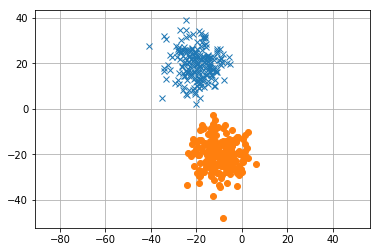

In [850]:
import numpy as np
import matplotlib.pyplot as plt


mean1 = [-20, 20]
cov1 = [[40, 0], [0, 40]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

mean2 = [-10, -20]
cov2 = [[40, 0], [0, 40]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'o')
plt.axis('equal')
plt.grid()
plt.show()

In [851]:
#x1
bias = np.ones(200, dtype=np.int) #Add bias term

pos = np.column_stack([x1,y1,bias])
neg = np.column_stack([x2,y2,bias])

all_patterns = np.concatenate([pos,neg])

In [852]:
targets = np.ones(200,dtype=np.int)
minus = -1 * np.ones(200,dtype=np.int)
targets = np.append(targets,minus)

all_samples = np.column_stack([all_patterns,targets])
np.random.shuffle(all_samples)

In [853]:
patterns = all_samples[:200,:3]
targets = all_samples[:200,3]

test_patterns = all_samples[200:,:3]
test_targets = all_samples[200:,3]
#print(test_patterns)
#print(test_targets)

In [854]:
def initWeights(dim):
    w = []
    for i in range(dim):
        w.append(np.random.normal(0,0.01))
    return w
        

In [855]:
#Dimension 2 columns, one for each dimension in input data
#W = 0.01 * np.random.randn(2,2)
W=initWeights(3)
print(W)

[-0.004300832991969649, 0.0007026004385958744, -0.0077692829819645546]


In [856]:
def test(W,X,y):
    predictions = []
    corr = 0
    for i in range(len(y)):        
        pred = np.dot(W,X[i])
        if pred>0:
            predictions.append(1)
        else:
            predictions.append(-1)
    #print(predictions)
    #print(y)
    
    for i in range(len(predictions)):
        if predictions[i]==y[i]:
            corr+=1
            
    acc = corr/len(y)
    return acc

In [857]:
def train_seq(patterns,targets,W,epochs):
    eta = 0.00001

    #Sekventiell
    for i in range(epochs):
        prediction = np.dot(patterns[i],W) #w*X
        error = prediction-targets[i] #beräkna felet

        delta_w = -eta*np.dot(error,np.transpose(patterns[i])) #uppdatera vikterna
        W = np.add(W,delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For iteration",i,"acc is:",acc)
     
    return W

W_seq = train_seq(patterns,targets,W,10)
print(W_seq)

For iteration 0 acc is: 0.65
For iteration 1 acc is: 0.655
For iteration 2 acc is: 0.685
For iteration 3 acc is: 0.71
For iteration 4 acc is: 0.735
For iteration 5 acc is: 0.735
For iteration 6 acc is: 0.75
For iteration 7 acc is: 0.76
For iteration 8 acc is: 0.81
For iteration 9 acc is: 0.845
[-0.00434379  0.00237293 -0.00779363]


In [858]:
print(test(W_seq,test_patterns,test_targets)) 

0.845


In [859]:
def train_batch(patterns,targets,W,epoch):
    eta = 0.00001
    delta_w=0
    print(test(W,test_patterns,test_targets))
    for n in range(epoch):
        error=0
        delta_w=0
        for i in range(len(targets)):
            prediction = np.dot(patterns[i],W) 
            error = prediction-targets[i]
            #print(error)
            delta_w += -eta*np.dot(error,np.transpose(patterns[i]))
        #uppdatera vikterna
        delta_w = delta_w/epoch
        ##print(delta_w)
        W = np.add(W,delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",n,"acc is:",acc)
    return W

W=initWeights(3)
W_batch = train_batch(patterns,targets,W,20)
print(W_batch)
print(test(W_batch,test_patterns,test_targets)) 

0.08
For epoch 0 acc is: 0.17
For epoch 1 acc is: 0.385
For epoch 2 acc is: 0.48
For epoch 3 acc is: 0.51
For epoch 4 acc is: 0.615
For epoch 5 acc is: 0.715
For epoch 6 acc is: 0.86
For epoch 7 acc is: 0.92
For epoch 8 acc is: 0.925
For epoch 9 acc is: 0.955
For epoch 10 acc is: 0.965
For epoch 11 acc is: 0.98
For epoch 12 acc is: 0.985
For epoch 13 acc is: 0.99
For epoch 14 acc is: 0.99
For epoch 15 acc is: 0.99
For epoch 16 acc is: 1.0
For epoch 17 acc is: 1.0
For epoch 18 acc is: 1.0
For epoch 19 acc is: 1.0
[-0.00907929  0.021827    0.00620005]
1.0
